# Exercise 1: Create a Graph with NetworkX

## 1. Import Required Libraries

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## 2. What do the following instructions do?

### `cG = nx.complete_graph(7)`
- **Creates a complete graph** with 7 nodes (labeled 0 to 6)
- In a complete graph, **every node is connected to every other node**
- Number of edges = n(n-1)/2 = 7×6/2 = **21 edges**

### `nx.draw(cG, with_labels=True)`
- **Draws the graph** using matplotlib
- `with_labels=True` displays the node labels on the visualization

### `plt.savefig('completeGraph.png')`
- **Saves the visualization** as an image file named 'completeGraph.png' in the current directory

### 3. Create an Empty Graph

In [4]:
# Create an empty graph
G = nx.Graph()
print("Empty graph created!")

Empty graph created!


### 4. Add Vertices (Nodes)

In [5]:
# Add nodes one by one using add_node()
G.add_node(1)
G.add_node(2)

# Add multiple nodes at once using add_nodes_from()
G.add_nodes_from([3, 4, 5, 6, 'A', 'B', 'C', 'D'])

print(f"Nodes added: {list(G.nodes())}")
print(f"Total number of nodes: {G.number_of_nodes()}")

Nodes added: [1, 2, 3, 4, 5, 6, 'A', 'B', 'C', 'D']
Total number of nodes: 10


### 5. Add Edges

Based on the image, we'll add edges to create the two graph components:

In [6]:
# Add edges one by one using add_edge()
G.add_edge(1, 2)
G.add_edge(1, 6)

# Add multiple edges at once using add_edges_from()
# Left component edges
G.add_edges_from([
    (2, 3),    # 2 connects to 3
    (2, 6),    # 2 connects to 6
    (3, 4),    # 3 connects to 4
    (6, 5)     # 6 connects to 5
])

# Right component edges
G.add_edges_from([
    ('A', 'B'),    # A connects to B
    ('B', 'C'),    # B connects to C
    ('B', 'D'),    # B connects to D
    ('A', 'D')     # A connects to D
])

print(f"Edges added: {list(G.edges())}")
print(f"Total number of edges: {G.number_of_edges()}")

Edges added: [(1, 2), (1, 6), (2, 3), (2, 6), (3, 4), (5, 6), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('B', 'D')]
Total number of edges: 10


### 6. Draw the Graph

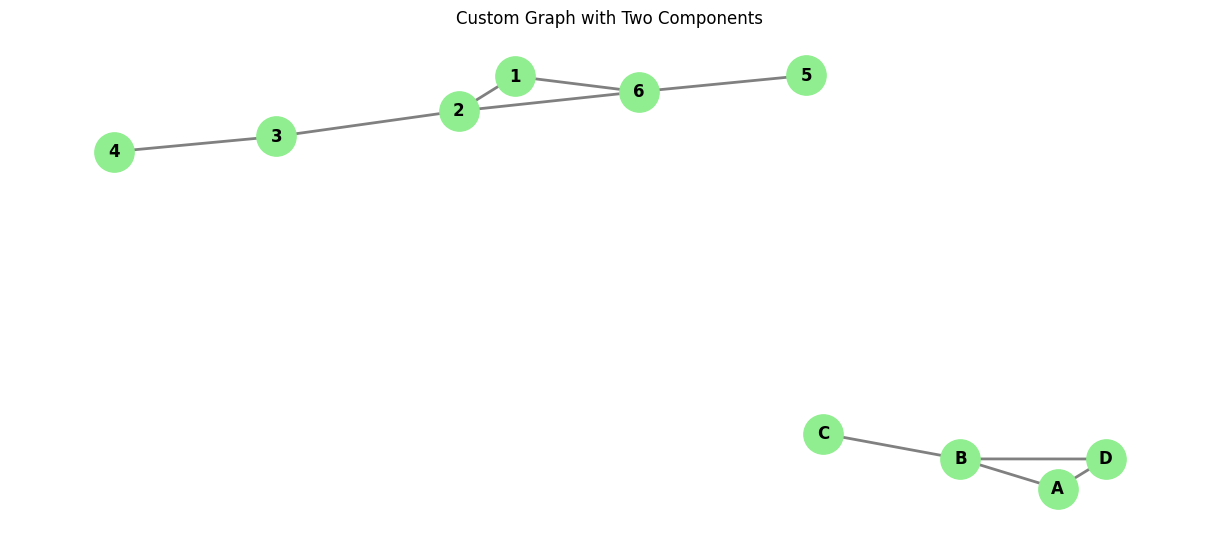

In [7]:
# Draw the graph
plt.figure(figsize=(12, 5))

# Use spring layout for better visualization
pos = nx.spring_layout(G, seed=42)

# Draw the graph with labels
nx.draw(G, pos, with_labels=True, node_color='lightgreen', 
        node_size=800, font_size=12, font_weight='bold', 
        edge_color='gray', width=2)

plt.title("Custom Graph with Two Components")
plt.savefig('custom_graph.png')
plt.show()

### 7. Test Graph Functions

Let's test various NetworkX functions to analyze our graph:

In [8]:
print("=" * 50)
print("GRAPH ANALYSIS")
print("=" * 50)

# G.nodes - Returns a view of all nodes
print(f"\n1. G.nodes(): {list(G.nodes())}")

# G.edges - Returns a view of all edges
print(f"\n2. G.edges(): {list(G.edges())}")

# G.order - Returns the number of nodes
print(f"\n3. G.order(): {G.order()}")

# G.degree - Returns the degree of all nodes
print(f"\n4. G.degree(): {dict(G.degree())}")

# G.neighbors - Returns neighbors of a specific node
print(f"\n5. G.neighbors(2): {list(G.neighbors(2))}")
print(f"   G.neighbors('B'): {list(G.neighbors('B'))}")

# G.number_of_edges - Returns the total number of edges
print(f"\n6. G.number_of_edges(): {G.number_of_edges()}")

print("\n" + "=" * 50)

GRAPH ANALYSIS

1. G.nodes(): [1, 2, 3, 4, 5, 6, 'A', 'B', 'C', 'D']

2. G.edges(): [(1, 2), (1, 6), (2, 3), (2, 6), (3, 4), (5, 6), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('B', 'D')]

3. G.order(): 10

4. G.degree(): {1: 2, 2: 3, 3: 2, 4: 1, 5: 1, 6: 3, 'A': 2, 'B': 3, 'C': 1, 'D': 2}

5. G.neighbors(2): [1, 3, 6]
   G.neighbors('B'): ['A', 'C', 'D']

6. G.number_of_edges(): 10



### 8. Verify the Handshaking Lemma

The **Handshaking Lemma** states that the sum of all vertex degrees equals twice the number of edges:

$$\sum_{v \in V} \deg(v) = 2|E|$$

In [9]:
# Calculate the sum of all vertex degrees
sum_of_degrees = sum(dict(G.degree()).values())

# Calculate twice the number of edges
twice_edges = 2 * G.number_of_edges()

# Display results
print("=" * 50)
print("HANDSHAKING LEMMA VERIFICATION")
print("=" * 50)
print(f"\nSum of all vertex degrees: {sum_of_degrees}")
print(f"Twice the number of edges (2 × {G.number_of_edges()}): {twice_edges}")
print(f"\nAre they equal? {sum_of_degrees == twice_edges}")

if sum_of_degrees == twice_edges:
    print("The Handshaking Lemma is verified!")
else:
    print("Something is wrong with the graph structure.")
    
print("=" * 50)

HANDSHAKING LEMMA VERIFICATION

Sum of all vertex degrees: 20
Twice the number of edges (2 × 10): 20

Are they equal? True
The Handshaking Lemma is verified!


---

## 1.1 Create a Graph from an Edge List

### 9. Create a Text File with Edge List

First, let's create a text file `graph.edges` containing the edge list of our graph:

In [10]:
# Create the graph.edges file
with open('graph.edges', 'w') as f:
    # Write each edge on a new line
    f.write("1 2\n")
    f.write("1 6\n")
    f.write("2 3\n")
    f.write("2 6\n")
    f.write("3 4\n")
    f.write("6 5\n")
    f.write("A B\n")
    f.write("B C\n")
    f.write("B D\n")
    f.write("A D\n")

print("✓ File 'graph.edges' created successfully!")
print("\nFile content:")
with open('graph.edges', 'r') as f:
    print(f.read())

✓ File 'graph.edges' created successfully!

File content:
1 2
1 6
2 3
2 6
3 4
6 5
A B
B C
B D
A D



### 10. Read Graph from Edge List File

In [11]:
# Read the graph from the edge list file
G_from_file = nx.read_edgelist('./graph.edges', nodetype=str)

print("Graph loaded from 'graph.edges' file!")
print(f"\nNodes: {list(G_from_file.nodes())}")
print(f"Edges: {list(G_from_file.edges())}")
print(f"Number of nodes: {G_from_file.number_of_nodes()}")
print(f"Number of edges: {G_from_file.number_of_edges()}")

Graph loaded from 'graph.edges' file!

Nodes: ['1', '2', '6', '3', '4', '5', 'A', 'B', 'C', 'D']
Edges: [('1', '2'), ('1', '6'), ('2', '3'), ('2', '6'), ('6', '5'), ('3', '4'), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('B', 'D')]
Number of nodes: 10
Number of edges: 10


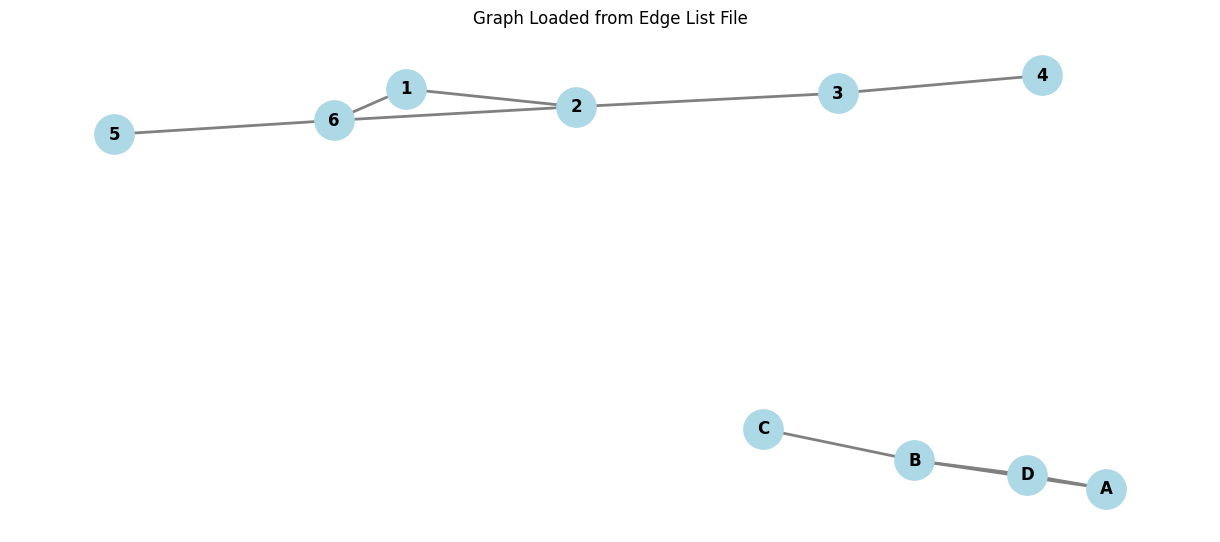

In [12]:
# Visualize the graph loaded from file
plt.figure(figsize=(12, 5))
pos = nx.spring_layout(G_from_file, seed=42)
nx.draw(G_from_file, pos, with_labels=True, node_color='lightblue', 
        node_size=800, font_size=12, font_weight='bold', 
        edge_color='gray', width=2)
plt.title("Graph Loaded from Edge List File")
plt.show()

---

## 1.2 Save a Graph

### Method 1: Save as Edge List (.edges)

In [13]:
# Save the graph as an edge list
nx.write_edgelist(G, "graph.edges")
print("✓ Graph saved as 'graph.edges'")

# Display the saved file content
print("\nSaved edge list content:")
with open('graph.edges', 'r') as f:
    content = f.read()
    print(content)

✓ Graph saved as 'graph.edges'

Saved edge list content:
1 2 {}
1 6 {}
2 3 {}
2 6 {}
3 4 {}
5 6 {}
A B {}
A D {}
B C {}
B D {}



### Method 2: Save as GraphML (.graphml)

In [14]:
# Save the graph as GraphML format
nx.write_graphml_lxml(G, "./graph.graphml")
print("Graph saved as 'graph.graphml'")

Graph saved as 'graph.graphml'


---

## 2. Search and Connectivity on Graphs

**11. What does `nx.bfs_edges(G, 1)` do?**

- **BFS** (Breadth-First Search) explores the graph level by level
- Starting from node **1**, it visits all neighbors first, then their neighbors, and so on
- Returns an iterator of edges in the order they are traversed
- Useful for finding shortest paths in unweighted graphs

In [15]:
# Perform BFS traversal starting from node 1
l = list(nx.bfs_edges(G, 1))
print('BFS : ', l)

BFS :  [(1, 2), (1, 6), (2, 3), (6, 5), (3, 4)]


### 12. What does `nx.dfs_edges(G, 1)` do?**

- **DFS** (Depth-First Search) explores the graph by going as deep as possible before backtracking
- Starting from node **1**, it follows one path as far as possible, then backtracks
- Returns an iterator of edges in the order they are traversed
- Useful for detecting cycles, topological sorting, and pathfinding

In [16]:
# Perform DFS traversal starting from node 1
l = list(nx.dfs_edges(G, 1))
print('DFS : ', l)

DFS :  [(1, 2), (2, 3), (3, 4), (2, 6), (6, 5)]


### Comparison: BFS vs DFS

| Algorithm | Strategy | Order | Use Cases |
|-----------|----------|-------|-----------|
| **BFS** | Level by level (breadth) | Visits all neighbors before going deeper | Shortest path, level-order traversal |
| **DFS** | As deep as possible (depth) | Explores one branch fully before backtracking | Cycle detection, topological sort |

**Key Difference:** 
- BFS uses a **queue** (FIFO - First In First Out)
- DFS uses a **stack** (LIFO - Last In First Out)

### 13. Check Graph Connectivity and Components

In [17]:
# Check if the graph is connected
is_connected = nx.is_connected(G)

# Get the number of connected components
num_components = nx.number_connected_components(G)

# Get all connected components
components = list(nx.connected_components(G))

# Display results
print("=" * 60)
print("GRAPH CONNECTIVITY ANALYSIS")
print("=" * 60)

print(f"\nIs the graph connected? {is_connected}")
print(f"Number of connected components: {num_components}")

print("\n" + "-" * 60)
print("COMPONENTS DETAILS:")
print("-" * 60)

for i, component in enumerate(components, 1):
    print(f"\nComponent {i}:")
    print(f"  Vertices: {sorted(component)}")
    print(f"  Size: {len(component)} nodes")
    
print("\n" + "=" * 60)

# Explanation
if is_connected:
    print("\nThe graph is CONNECTED: There is a path between every pair of nodes.")
else:
    print(f"\nThe graph is NOT CONNECTED: It has {num_components} separate components.")

GRAPH CONNECTIVITY ANALYSIS

Is the graph connected? False
Number of connected components: 2

------------------------------------------------------------
COMPONENTS DETAILS:
------------------------------------------------------------

Component 1:
  Vertices: [1, 2, 3, 4, 5, 6]
  Size: 6 nodes

Component 2:
  Vertices: ['A', 'B', 'C', 'D']
  Size: 4 nodes


The graph is NOT CONNECTED: It has 2 separate components.


### 14. Adjacency Matrix

The **adjacency matrix** is a square matrix representing the graph where:
- Rows and columns represent nodes
- Entry $(i, j) = 1$ if there's an edge between node $i$ and node $j$
- Entry $(i, j) = 0$ if there's no edge

In [19]:
# Get the adjacency matrix
M = nx.adjacency_matrix(G)

print("Adjacency matrix of G:")
print(M)
print(f"\nType: {type(M)}")
print(f"Shape: {M.shape}")

# Convert to dense array for better visualization
import numpy as np
M_dense = M.todense()

print("\n" + "=" * 60)
print("ADJACENCY MATRIX (Dense Format):")
print("=" * 60)
print(M_dense)

# Show node order
print(f"\nNode order: {list(G.nodes())}")

Adjacency matrix of G:
<Compressed Sparse Row sparse array of dtype 'int64'
	with 20 stored elements and shape (10, 10)>
  Coords	Values
  (0, 1)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 5)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1
  (4, 5)	1
  (5, 0)	1
  (5, 1)	1
  (5, 4)	1
  (6, 7)	1
  (6, 9)	1
  (7, 6)	1
  (7, 8)	1
  (7, 9)	1
  (8, 7)	1
  (9, 6)	1
  (9, 7)	1

Type: <class 'scipy.sparse._csr.csr_array'>
Shape: (10, 10)

ADJACENCY MATRIX (Dense Format):
[[0 1 0 0 0 1 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 0 0]]

Node order: [1, 2, 3, 4, 5, 6, 'A', 'B', 'C', 'D']


### Explanation of the Adjacency Matrix Result

**What the result shows:**

1. **Type**: `scipy.sparse.csr_matrix` - NetworkX returns a sparse matrix for efficiency (saves memory for large graphs)

2. **Shape**: $(n \times n)$ where $n$ is the number of nodes

3. **Matrix Structure**:
   - The matrix is **symmetric** for undirected graphs (entry $(i,j) =$ entry $(j,i)$)
   - Diagonal is usually 0 (no self-loops in our graph)
   - Value 1 indicates an edge between nodes
   - Value 0 indicates no edge

4. **Reading the Matrix**:
   - Row $i$, Column $j$ = 1 means node $i$ is connected to node $j$
   - The sum of a row = degree of that node

### Custom Node Ordering with `attr_matrix`

Let's try using `nx.attr_matrix()` with a custom node ordering:

In [20]:
# Try using attr_matrix with custom node ordering
M_custom = nx.attr_matrix(G, rc_order=[1, 2, 3, 4, 5, 6, 'A', 'B', 'C', 'D'])

print('Adjacency matrix of G with custom ordering:')
print(M_custom)
print(f"\nType: {type(M_custom)}")

# Extract the matrix (first element of the tuple)
matrix_array = M_custom[0]
node_order = M_custom[1]

print(f"\nMatrix shape: {matrix_array.shape}")
print(f"Node order used: {node_order}")

Adjacency matrix of G with custom ordering:
[[0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]]

Type: <class 'numpy.ndarray'>

Matrix shape: (10,)
Node order used: [1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]


### Commentary on `attr_matrix` vs `adjacency_matrix`

**Key Differences:**

1. **Return Type**:
   - `nx.adjacency_matrix(G)` → Returns a **sparse matrix** (scipy.sparse.csr_matrix)
   - `nx.attr_matrix(G, rc_order=[...])` → Returns a **tuple**: `(numpy array, node_order)`

2. **Node Ordering**:
   - `nx.adjacency_matrix(G)` → Uses default node order (arbitrary)
   - `nx.attr_matrix(G, rc_order=[...])` → Allows you to **specify exact node order**
   - This is useful when you need consistent ordering across multiple operations

3. **Use Cases**:
   - **`adjacency_matrix`**: Quick adjacency matrix, memory-efficient for large graphs
   - **`attr_matrix`**: When you need control over node ordering or working with node attributes

4. **Matrix Structure**:
   - Both produce the same adjacency relationships
   - The difference is in control and format
   - `attr_matrix` returns a dense numpy array, easier for direct manipulation

### What do TC and TC_b represent?

#### **TC (Transitive Closure Matrix)**

**Formula**: $TC = (I + M)^{n-1}$

**What it represents:**
- **TC[i][j] > 0** means there is **at least one path** from node $i$ to node $j$
- The actual value in TC[i][j] represents the **number of paths** of length up to $n-1$ between nodes $i$ and $j$
- **Diagonal elements** are positive (each node can reach itself)
- For **disconnected components**, entries remain 0 (no path exists)

**Why $(I + M)^{n-1}$?**
- $I$ adds self-loops (each node can reach itself)
- $M$ represents direct edges (paths of length 1)
- $(I + M)^2$ gives paths of length ≤ 2
- $(I + M)^{n-1}$ gives paths of length ≤ $n-1$ (sufficient to find all reachable nodes)

#### **TC_b (Boolean Transitive Closure)**

**What it represents:**
- Converts TC to **boolean values** (True/False or 1/0)
- **TC_b[i][j] = True** means node $j$ is **reachable** from node $i$
- **TC_b[i][j] = False** means node $j$ is **not reachable** from node $i$
- Simplifies the matrix to just show **reachability** (yes/no) rather than path counts

---

## 3. Algorithms

### 15. What is the purpose of functionX?

In [21]:
def functionX(G, s):     
    F = []  
    order = 1  
    mark = {} 
    for i in G.nodes(): 
        mark[i] = -1   
    mark[s] = order 
    F.append(s) 
    while F: 
        x = F.pop(0) 
        for y in G.neighbors(x): 
            if mark[y] == -1: 
                F.append(y) 
                order = order + 1 
                mark[y] = order                     
    return mark

**Purpose**: BFS (Breadth-First Search) traversal that numbers nodes in visit order.

**Returns**: Dictionary with node numbers showing their discovery order from source node `s`.

**Key points**:
- `F.pop(0)` → queue behavior (FIFO) = BFS
- `mark[i] = -1` → unvisited nodes
- `mark[s] = order` → assigns visit order starting from 1
- Only visits nodes reachable from `s` (same component)

In [22]:
# Test functionX
result = functionX(G, 1)
print("BFS from node 1:")
print(result)

result2 = functionX(G, 'A')
print("\nBFS from node A:")
print(result2)

BFS from node 1:
{1: 1, 2: 2, 3: 4, 4: 6, 5: 5, 6: 3, 'A': -1, 'B': -1, 'C': -1, 'D': -1}

BFS from node A:
{1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 'A': 1, 'B': 2, 'C': 4, 'D': 3}


### 16. Detect if Graph is Acyclic

In [23]:
def is_acyclic_bfs(G):
    mark = {}
    parent = {}
    
    for node in G.nodes():
        mark[node] = -1
        parent[node] = None
    
    for start in G.nodes():
        if mark[start] == -1:
            F = [start]
            mark[start] = 0
            
            while F:
                x = F.pop(0)
                for y in G.neighbors(x):
                    if mark[y] == -1:
                        mark[y] = 0
                        parent[y] = x
                        F.append(y)
                    elif parent[x] != y:  # Found cycle
                        return False, f"Cycle detected: {x} -> {y}"
    
    return True, "Graph is acyclic (tree/forest)"

In [24]:
# Test on our graph G (has cycles)
result, msg = is_acyclic_bfs(G)
print(f"Graph G: {msg}")

# Create acyclic graph (tree)
T = nx.Graph()
T.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5)])
result2, msg2 = is_acyclic_bfs(T)
print(f"Tree T: {msg2}")

Graph G: Cycle detected: 2 -> 6
Tree T: Graph is acyclic (tree/forest)


---

## 4. Graph Attributes - Weighted Graph

### 17. What is the purpose of the following?

In [25]:
# Add edge attribute (weight)
G['B']['A']['weight'] = 4

# Add node attribute (color)
G.nodes[1]['color'] = 'red'

# Display nodes with attributes
print(G.nodes(data=True))

# Display edges with attributes
print(G.edges(data=True))

[(1, {'color': 'red'}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), ('A', {}), ('B', {}), ('C', {}), ('D', {})]
[(1, 2, {}), (1, 6, {}), (2, 3, {}), (2, 6, {}), (3, 4, {}), (5, 6, {}), ('A', 'B', {'weight': 4}), ('A', 'D', {}), ('B', 'C', {}), ('B', 'D', {})]


**Purpose**:

- `G['B']['A']['weight'] = 4` → Adds **edge attribute** 'weight' with value 4 to edge B-A
- `G.nodes[1]['color'] = 'red'` → Adds **node attribute** 'color' with value 'red' to node 1
- `G.nodes(data=True)` → Returns nodes with their attributes as key-value pairs
- `G.edges(data=True)` → Returns edges with their attributes as key-value pairs

**Use**: Store metadata like weights (distances, costs), colors (for visualization), or any custom properties on nodes/edges.

### 18. Create Text File with Graph Data

In [26]:
# Create text file with graph data
with open('graph_data.txt', 'w') as f:
    f.write("H1 1 2\n")
    f.write("H1 3 8\n")
    f.write("H2 1 7\n")
    f.write("H2 2 5\n")
    f.write("1 2 1\n")
    f.write("1 4 5\n")
    f.write("2 1 3\n")
    f.write("2 4 3\n")
    f.write("3 4 2\n")
    f.write("3 V 3\n")
    f.write("4 3 1\n")
    f.write("4 V 5\n")

print("✓ File 'graph_data.txt' created")
print("\nContent:")
with open('graph_data.txt', 'r') as f:
    print(f.read())

✓ File 'graph_data.txt' created

Content:
H1 1 2
H1 3 8
H2 1 7
H2 2 5
1 2 1
1 4 5
2 1 3
2 4 3
3 4 2
3 V 3
4 3 1
4 V 5



### 19. Dijkstra's Shortest Path from H1 to V

In [27]:
# First, rename the file and read the graph
import os
os.rename('graph_data.txt', 'wG.txt')

# Read directed weighted graph
wG = nx.read_edgelist('./wG.txt', 
                      create_using=nx.DiGraph(), 
                      nodetype=str, 
                      data=(('weight', int),))

print("Graph loaded:")
print(f"Nodes: {list(wG.nodes())}")
print(f"Edges with weights: {list(wG.edges(data=True))}")

Graph loaded:
Nodes: ['H1', '1', '3', 'H2', '2', '4', 'V']
Edges with weights: [('H1', '1', {'weight': 2}), ('H1', '3', {'weight': 8}), ('1', '2', {'weight': 1}), ('1', '4', {'weight': 5}), ('3', '4', {'weight': 2}), ('3', 'V', {'weight': 3}), ('H2', '1', {'weight': 7}), ('H2', '2', {'weight': 5}), ('2', '1', {'weight': 3}), ('2', '4', {'weight': 3}), ('4', '3', {'weight': 1}), ('4', 'V', {'weight': 5})]


In [28]:
# Dijkstra's algorithm: shortest path from H1 to V
path = nx.dijkstra_path(wG, 'H1', 'V', weight='weight')
length = nx.dijkstra_path_length(wG, 'H1', 'V', weight='weight')

print(f"Shortest path from H1 to V: {path}")
print(f"Total distance: {length}")

Shortest path from H1 to V: ['H1', '1', '2', '4', '3', 'V']
Total distance: 10


### 20. Create Graph with Bandwidth Attribute

In [29]:
# Create graph with bandwidth (BW) attribute from image
BW_G = nx.Graph()

# Add edges with BW attribute
edges_bw = [
    (0, 1, 3), (0, 2, 10), (0, 3, 15),
    (1, 2, 8), (1, 3, 7), (1, 4, 4),
    (2, 4, 5), (2, 5, 12),
    (3, 4, 9), (3, 5, 10),
    (4, 5, 12), (4, 6, 13),
    (5, 6, 11)
]

for u, v, bw in edges_bw:
    BW_G.add_edge(u, v, BW=bw)

print(f"Nodes: {list(BW_G.nodes())}")
print(f"Edges with BW: {list(BW_G.edges(data='BW'))}")

Nodes: [0, 1, 2, 3, 4, 5, 6]
Edges with BW: [(0, 1, 3), (0, 2, 10), (0, 3, 15), (1, 2, 8), (1, 3, 7), (1, 4, 4), (2, 4, 5), (2, 5, 12), (3, 4, 9), (3, 5, 10), (4, 5, 12), (4, 6, 13), (5, 6, 11)]


### 21. Modified Dijkstra for Maximum Bandwidth Path

In [30]:
import heapq

def max_bandwidth_path(G, source, target):
    # Initialize bandwidth dictionary (max BW from source to each node)
    bandwidth = {node: 0 for node in G.nodes()}
    bandwidth[source] = float('inf')
    
    # Track parent nodes for path reconstruction
    parent = {node: None for node in G.nodes()}
    
    # Priority queue: (-bandwidth, node) - negative for max heap
    pq = [(-float('inf'), source)]
    visited = set()
    
    while pq:
        neg_bw, u = heapq.heappop(pq)
        curr_bw = -neg_bw
        
        if u in visited:
            continue
        visited.add(u)
        
        if u == target:
            break
        
        # Explore neighbors
        for v in G.neighbors(u):
            if v not in visited:
                edge_bw = G[u][v]['BW']
                # Bottleneck bandwidth = min of current path BW and edge BW
                new_bw = min(curr_bw, edge_bw)
                
                if new_bw > bandwidth[v]:
                    bandwidth[v] = new_bw
                    parent[v] = u
                    heapq.heappush(pq, (-new_bw, v))
    
    # Reconstruct path
    path = []
    node = target
    while node is not None:
        path.append(node)
        node = parent[node]
    path.reverse()
    
    return path, bandwidth[target]

In [31]:
# Test: Find path with maximum bandwidth from node 0 to node 6
path, max_bw = max_bandwidth_path(BW_G, 0, 6)

print(f"Optimal path (max bandwidth): {path}")
print(f"Bottleneck bandwidth: {max_bw}")

# Show bandwidth of each edge in path
print("\nPath edges with BW:")
for i in range(len(path) - 1):
    u, v = path[i], path[i+1]
    print(f"  {u} -> {v}: BW = {BW_G[u][v]['BW']}")

Optimal path (max bandwidth): [0, 3, 5, 6]
Bottleneck bandwidth: 10

Path edges with BW:
  0 -> 3: BW = 15
  3 -> 5: BW = 10
  5 -> 6: BW = 11


---

## 5. Internet Analysis

### 22. Load and Analyze Internet Graph

### 23. Determine Number of Nodes and Check Connectivity

In [32]:
# Load the internet graph from file
internet_G = nx.read_edgelist('./internet_graph.txt', 
                              create_using=nx.Graph(), 
                              nodetype=int,
                              data=(('relationship', int),))

# Number of nodes
num_nodes = internet_G.number_of_nodes()
print(f"\nNumber of nodes: {num_nodes}")

# Number of edges
num_edges = internet_G.number_of_edges()
print(f"Number of edges: {num_edges}")

# Check connectivity
is_connected = nx.is_connected(internet_G)
print(f"\nIs the Internet connected? {is_connected}")

if is_connected:
    print("The Internet graph is CONNECTED")
    print("There is a path between every pair of nodes")
else:
    num_components = nx.number_connected_components(internet_G)
    print(f"The Internet graph has {num_components} separate components")


Number of nodes: 20305
Number of edges: 42568

Is the Internet connected? True
The Internet graph is CONNECTED
There is a path between every pair of nodes


### 24. What does the displayed value represent?

**Answer**: The value represents the **MAXIMUM DEGREE** in the graph.

**Explanation**:
- `nx.degree_histogram(G)` returns a list where:
  * Index `i` contains the count of nodes with degree `i`
  * List length = (max degree + 1) since indexing starts at 0
- Therefore, `len(histDeg) - 1` = maximum degree value

**Example**: If `histDeg = [0, 5, 3, 2, 0, 1]`
- Length = 6, so max degree = 6 - 1 = **5**
- 0 nodes with degree 0
- 5 nodes with degree 1
- 3 nodes with degree 2
- 2 nodes with degree 3
- 0 nodes with degree 4
- 1 node with degree 5 ← **this is the maximum**

In [33]:
histDeg = nx.degree_histogram(internet_G)
print(len(histDeg) - 1)

2398


### 25. Check if Internet Graph is Scale-Free

Scale-free networks have a few highly connected hubs and many low-degree nodes. On a log scale, this shows as a downward linear trend.

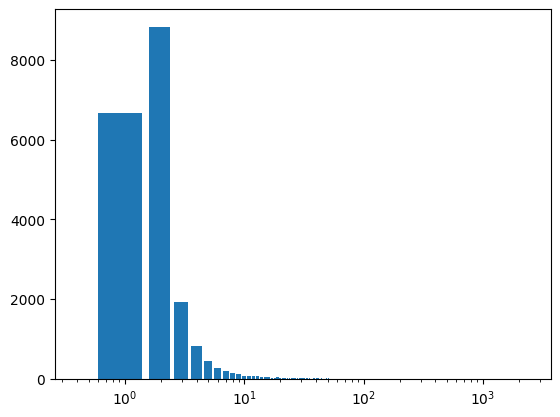

In [34]:
plt.xscale('log')
plt.bar(range(len(histDeg)), histDeg)
plt.savefig('scale_free_network.png')
plt.show()